In [1]:
from pyforest import *
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('./export_data/negative_direction/fillNA-mean/5-5/my_data_clean.csv')
df = df.drop('Unnamed: 0',axis=1)
df = df.sort_index(axis=1)

df

,0_0,0_1,0_2,0_3,0_4,1_0,1_1,1_2,1_3,1_4,...,4_3,4_4,a4,filename,height,hot_spot_nums,maxtmp,meantmp,process_name,tmp_integral
0,18.478268,29.377523,30.381542,24.582974,17.121124,24.635447,24.500401,24.188029,24.642875,24.700000,...,24.700000,17.596124,1.741966,20191205141649-2,180.8,0,30.1,24.7,97,0
1,8.569983,28.677213,28.844847,26.820977,8.551293,20.239664,24.731054,24.250235,24.539987,24.700000,...,24.700000,8.518029,2.012180,20191205141651-2,154.4,0,34.8,24.7,98,85
2,16.934404,25.300000,25.142694,21.729030,17.025045,21.715539,25.167267,25.228112,25.298036,25.300000,...,30.282150,18.793558,0.183852,20191205141653-2,121.5,1,30.9,25.3,99,14
3,3.576483,24.039302,28.068964,26.005633,6.694787,21.322800,24.731257,24.496585,24.387854,24.931452,...,23.103541,4.098558,2.299696,20191205141655-2,155.4,0,30.1,24.8,100,103
4,16.455826,20.890401,24.391891,24.961677,17.639127,24.772300,24.462992,24.350471,24.620136,23.971977,...,21.805469,17.428275,2.966194,20191205141657-2,148.3,0,28.5,24.7,101,0
5,3.544191,22.679577,25.100000,23.650756,5.819062,21.987737,25.100000,24.969998,24.842950,28.230870,...,23.431584,4.089433,-0.814723,20191205141659-2,141.2,1,29.6,25.1,102,463
6,8.167097,25.200000,25.200000,20.074552,8.360780,20.547291,24.902160,25.026094,25.200000,25.200000,...,28.456991,9.237758,0.435923,20191205141701-2,174.1,1,38.4,25.2,103,224
7,20.216045,29.928346,31.413032,24.607045,18.810963,25.712042,24.751303,24.537522,24.964577,25.000000,...,25.000000,19.291732,1.705961,20191205141703-2,178.1,0,29.5,25.0,104,451
8,3.919735,23.815177,25.199224,24.109341,6.417877,21.155617,25.200000,25.092029,25.363972,29.149589,...,24.090757,4.359545,-0.901580,20191205141705-2,150.3,1,29.2,25.2,105,823
9,11.554938,24.964509,24.664094,19.607787,11.696644,19.509675,24.920557,24.396992,24.477916,24.878381,...,24.700000,12.576938,-2.833010,20191205141707-2,156.6,1,35.9,24.7,106,199


In [26]:
np.max(df['1_1'].values)

37.00693446

In [15]:
def get_train_val_test(df,train_rate,val_rate):
    
    return df.iloc[0:int(len(df)*train_rate)],df.iloc[int(len(df)*train_rate):int(len(df)*train_rate)+int(len(df)*val_rate)],    df.iloc[int(len(df)*train_rate)+int(len(df)*val_rate):]

In [16]:
df_train,df_val,df_test = get_train_val_test(df,0.7,0.2)
print(df_train.shape,df_val.shape,df_test.shape)

(18302, 33) (5229, 33) (2616, 33)


In [ ]:
useless = ['0_0','0_4','4_0','4_4','a4','filename','process_name']
cols = list(set(df.columns)-set(useless))
features = ['height','tmp_integral','hot_spot_nums','meantmp','maxtmp']#5个
df = df[cols]
df = df.sort_index(axis=1)
df
# cols

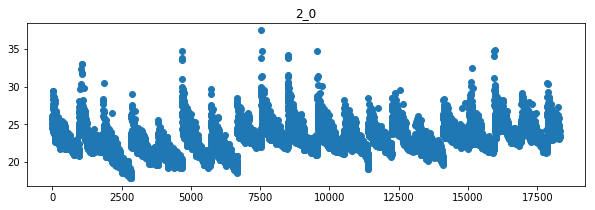

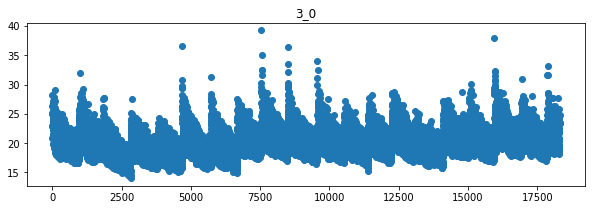

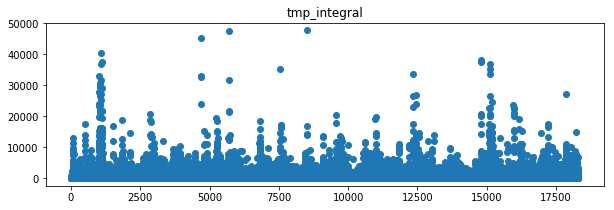

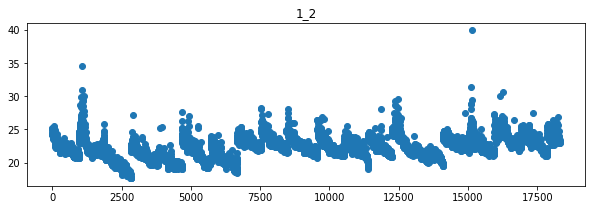

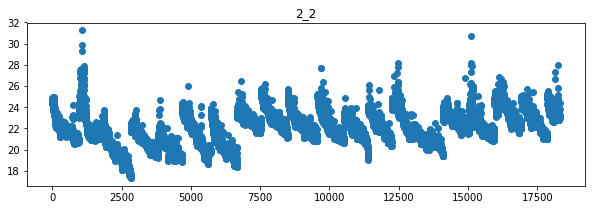

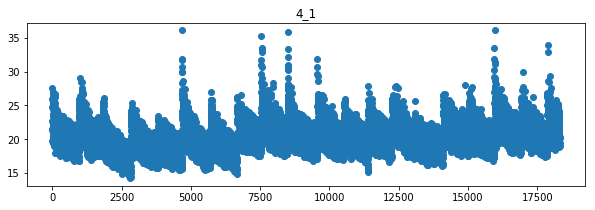

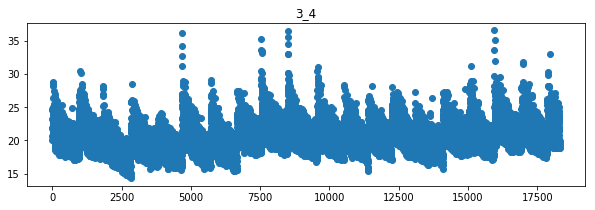

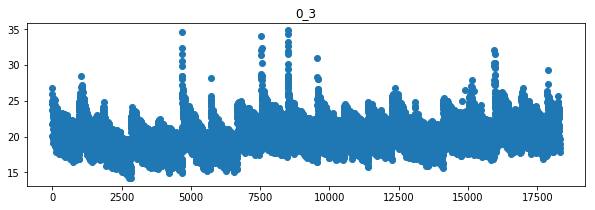

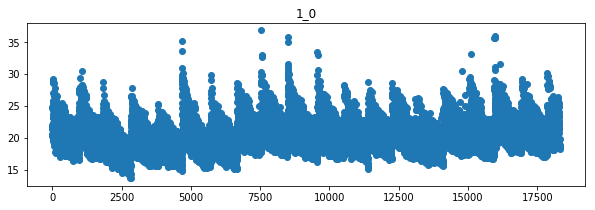

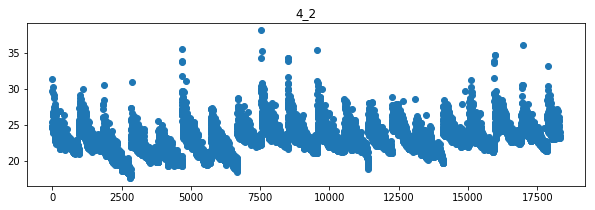

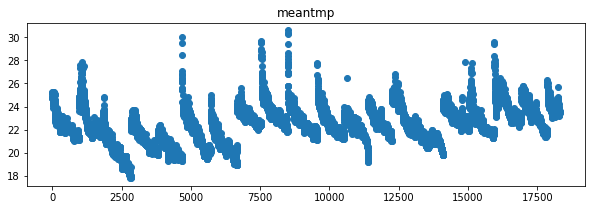

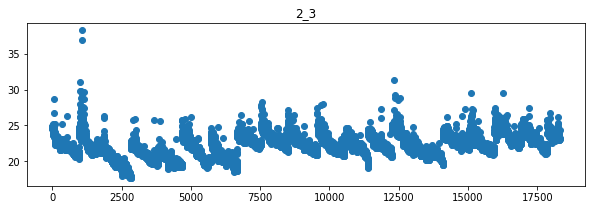

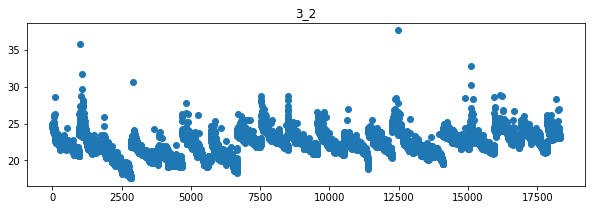

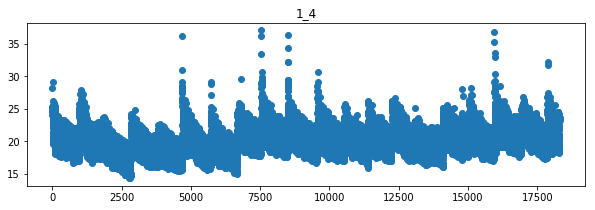

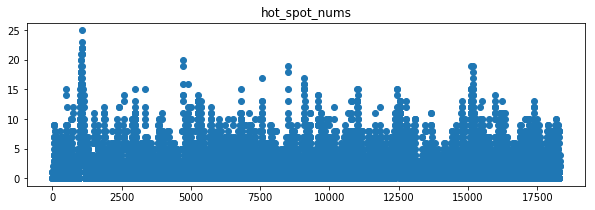

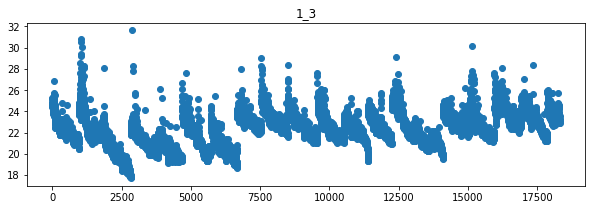

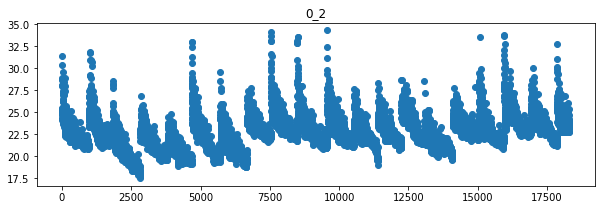

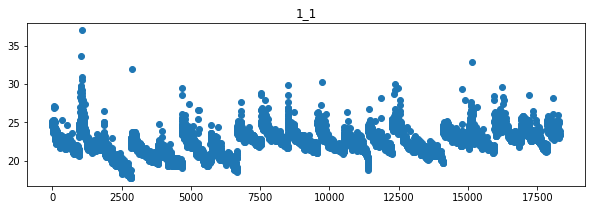

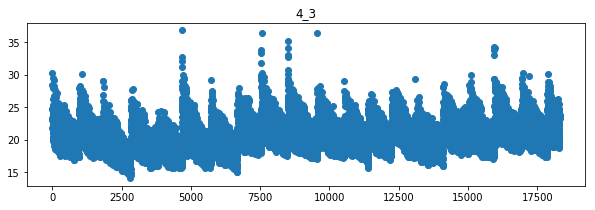

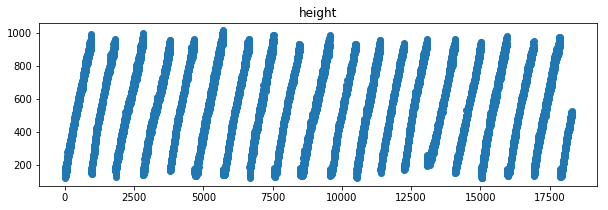

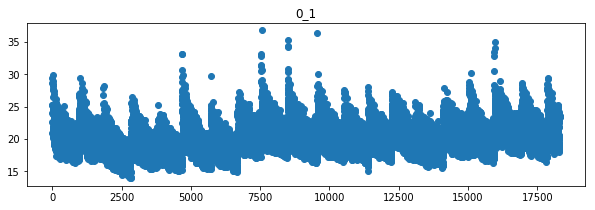

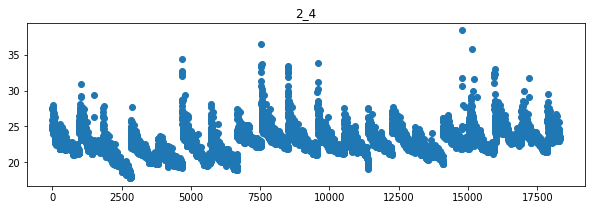

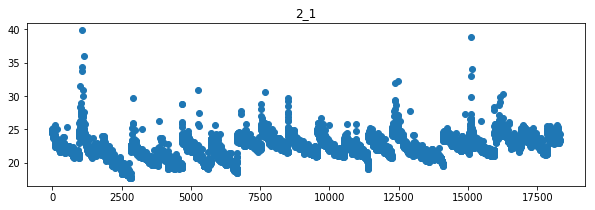

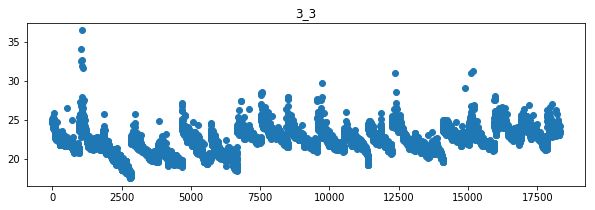

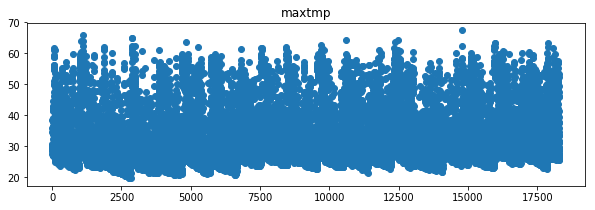

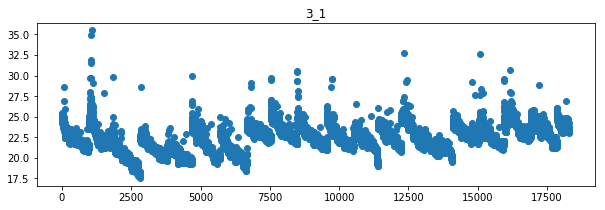

In [18]:
import matplotlib.pyplot as plt
#查看第一部分数据的散点图
for i in cols:
    plt.figure(figsize=(10,3))
    plt.scatter(range(len(df_train[i])),df_train[i])
    plt.title(i)
    plt.show()

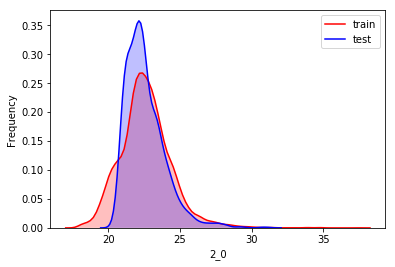

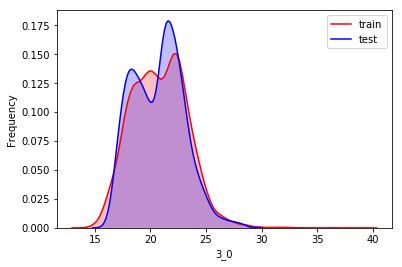

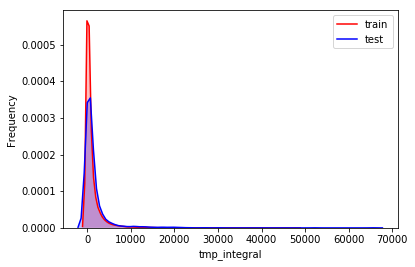

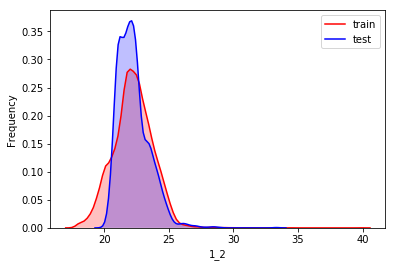

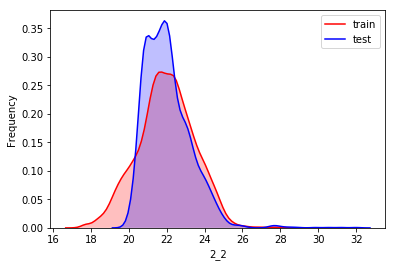

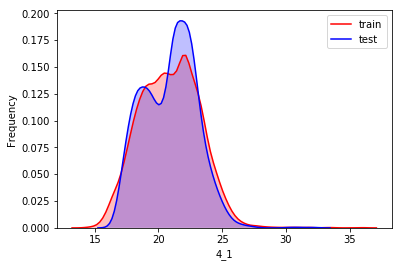

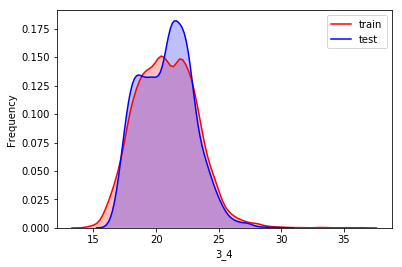

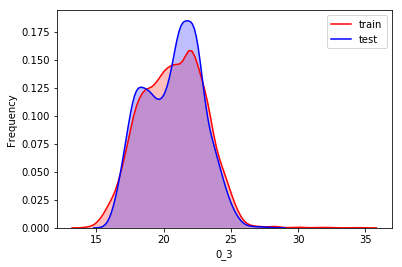

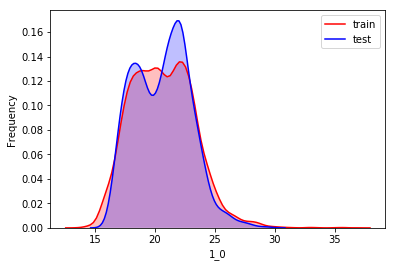

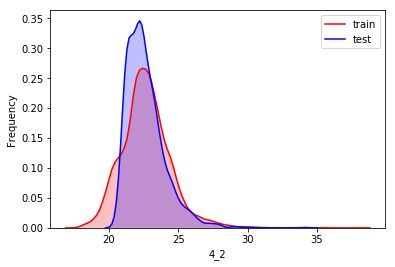

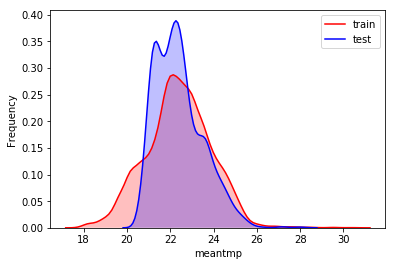

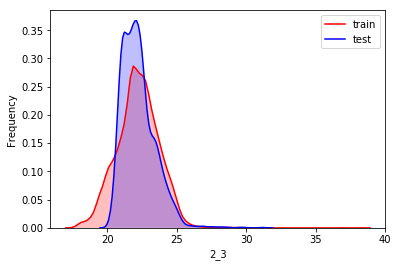

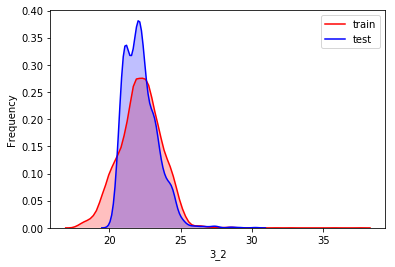

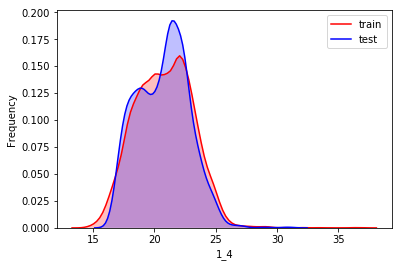

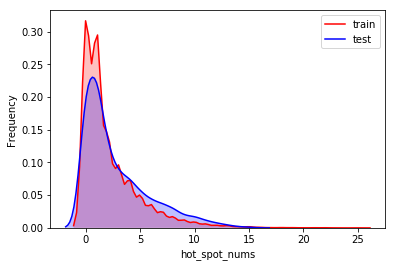

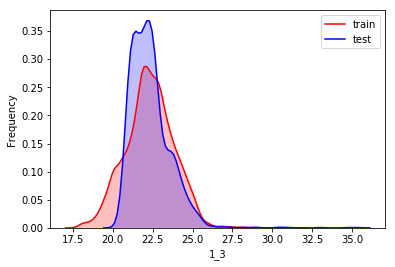

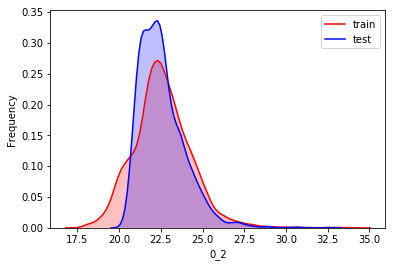

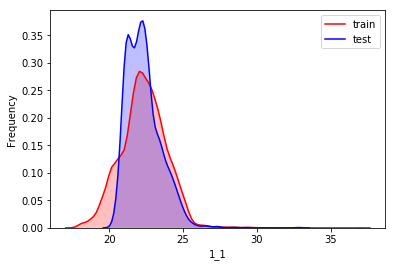

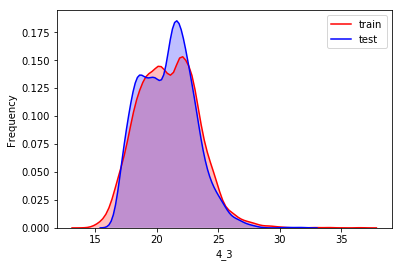

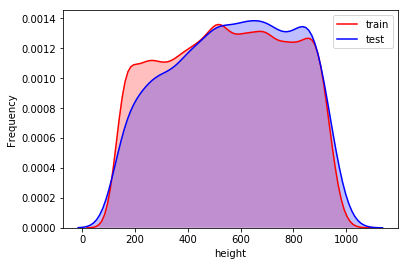

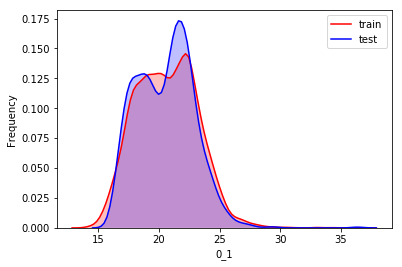

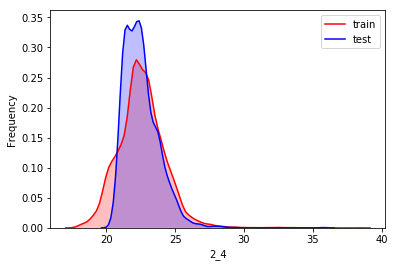

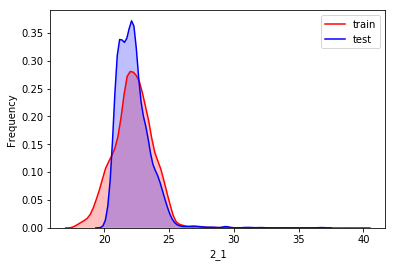

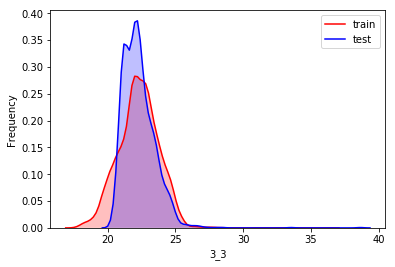

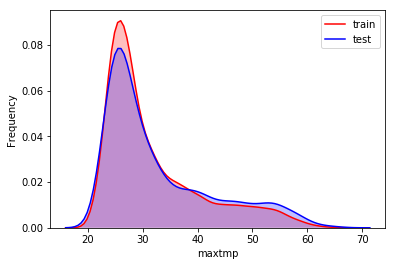

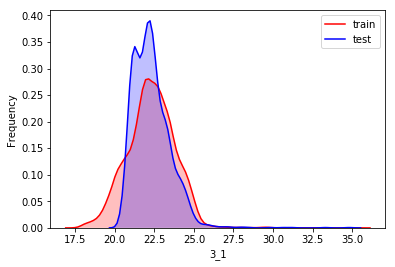

In [25]:
for column in cols:
    g = sns.kdeplot(df_train[column], color="Red", shade = True)
    g = sns.kdeplot(df_test[column], ax =g, color="Blue", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()